## Итоговое задание
Вы получили данные от интернет-магазина, который продает товары онлайн. Вашей задачей является анализ данных, выявление инсайтов и предоставление рекомендаций для улучшения показателей магазина.

#### Данные

База данных (SQL):

__Orders__ — информация о заказах (ID заказа, ID клиента, дата заказа, сумма заказа, способ оплаты).  
__Customers__ — информация о клиентах (ID клиента, возраст, пол, город).  
__Products__ — информация о товарах (ID товара, название товара, категория, цена).  
__OrderItems__ — информация о товарах в заказах (ID заказа, ID товара, количество).  
__Visits__ — данные о посещениях сайта (ID клиента, дата визита, источник трафика, версия сайта).  
-- версия сайта используется только для проведения АВ теста

CSV файлы:

__Promotions.csv__ — данные о маркетинговых акциях (ID акции, ID товара, дата начала акции, дата окончания акции).  
__Weather.csv__ — данные о погоде (дата, город, температура, осадки) для анализа влияния погодных условий на продажи.


### Задания

#### Исследование данных:

Проведите первичный анализ всех доступных данных (SQL, CSV).  
Проверьте наличие пропусков и дубликатов. Опишите структуру данных, выделите ключевые переменные.


#### Обогащение данных:

- Загрузите данные о маркетинговых акциях из CSV файла и присоедините их к основным данным.  
- Извлеките данные о погоде для городов, представленных в базе данных. Присоедините их к данным о заказах по дате и городу.


#### Анализ продаж:

- Определите влияние маркетинговых акций на продажи. Какие товары лучше продавались во время акций?  
- Выявите, как погодные условия влияли на количество заказов в разных городах. Например, увеличивались ли продажи в дождливые дни?


#### Сегментация клиентов:

- Проведите сегментацию клиентов по частоте покупок и сумме потраченных средств. Определите, какие сегменты наиболее ценны для бизнеса.  
- Проанализируйте влияние акций на поведение клиентов из разных сегментов.


#### Анализ трафика:

Проанализируйте, какие источники трафика приводят наиболее платежеспособных клиентов. Влияют ли маркетинговые акции на привлечение клиентов через определенные каналы?


#### Поведение клиентов:

- Найдите среднее количество дней между заказами для активных клиентов. Как меняется этот показатель в зависимости от участия в акциях?
- Проведите анализ по возрастным группам: какие товары и категории чаще покупают разные возрастные категории? Как на это влияют акции?


#### Визуализация данных:

Постройте графики, которые визуализируют директору ключевые метрики: динамику продаж по месяцам, влияние погоды и акций на продажи, распределение возрастов клиентов и т.д. Покажите все, что по вашему мнению, важно подсветить директору для принятия управленческих решений.


#### Продуктовые метрики:

Рассчитайте основные продуктовые метрики: DAU, CAC (стоимость привлечения клиента), LTV (пожизненная ценность клиента).


#### A/B тестирование:

Компания тестирует две разные версии главной страницы своего сайта — версию A (стандартная страница) и версию B (страница с обновленным дизайном, где более активно представлены рекламные акции).  
Для каждой версии страницы собираются данные о визитах пользователей и их конверсии в заказы. Ваша задача — провести A/B тест и определить, есть ли статистически значимая разница в конверсии между этими двумя версиями.


#### Рекомендации:

На основе анализа данных, предложите три ключевые рекомендации по улучшению показателей магазина, учитывая влияние акций и внешних факторов (например, погоды).


### Дополнительно:  

Все расчеты должны сопровождаться пояснениями.  
Используйте SQL для извлечения данных, Python для обработки, обогащения и визуализации, статистические методы для проведения A/B тестов.

In [731]:
# Подключаем библиотеки
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [732]:
# Подключение к базе данных
conn = sqlite3.connect('ecommerce_data.db')

# Создание курсора для выполнения SQL-запросов
cursor = conn.cursor()

In [733]:
# Загружаем CSV
df_pm = pd.read_csv('Promotions.csv')
df_wt = pd.read_csv('Weather.csv')
print(df_pm.head(5))
print(df_wt.head(5))

   promotion_id  product_id  start_date    end_date
0             1          25  2024-04-23  2024-08-15
1             2          15  2023-09-19  2024-08-15
2             3          43  2024-04-24  2024-08-15
3             4          31  2024-05-04  2024-08-15
4             5          70  2024-05-14  2024-08-15
         date    city  temperature precipitation
0  2023-08-15  Moscow         20.1          Rain
1  2023-08-16  Moscow         20.9          Rain
2  2023-08-17  Moscow         15.7          Rain
3  2023-08-18  Moscow         22.5          Rain
4  2023-08-19  Moscow         19.8          Rain


In [734]:
# Проверка на пропущенные значения
print(f"Пропущенных значений Promotions: {df_pm.isna().sum().sum()}")
# Проверка на дубликаты
print(f"Дубликатов Promotions: {df_pm.duplicated().sum()}")

print(f"Пропущенных значений Weather: {df_wt.isna().sum().sum()}")
# Проверка на дубликаты
print(f"Дубликатов Weather: {df_wt.duplicated().sum()}")
# Заполняем строки с отсутвием осадков
df_wt['precipitation'].fillna('No', inplace=True)

Пропущенных значений Promotions: 0
Дубликатов Promotions: 0
Пропущенных значений Weather: 801
Дубликатов Weather: 0


C:\Users\Администратор\AppData\Local\Temp\2\ipykernel_2532\370892714.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wt['precipitation'].fillna('No', inplace=True)


Исследование данных:

Проведите первичный анализ всех доступных данных (SQL, CSV).  

Проверьте наличие пропусков и дубликатов. Опишите структуру данных, выделите ключевые переменные.

In [735]:
# Получаем информацию о имеющихся таблицах
query = '''
SELECT name FROM sqlite_master WHERE type='table';
'''
tables_df = pd.read_sql_query(query, conn)
for i, row in tables_df.iterrows():
    query = f'''
    SELECT * FROM {row['name']}
    LIMIT 2;
    '''
    result_df = pd.read_sql_query(query, conn)
    print(f"Название таблицы: {row['name']}")
    print(result_df)

Название таблицы: customers
   customer_id  age gender              city
0            1   56   Male            Moscow
1            2   69   Male  Saint Petersburg
Название таблицы: products
   product_id product_name category   price
0           1      Current    Books  969.89
1           2     Majority     Home  777.38
Название таблицы: orders
   order_id  customer_id  order_date  order_amount payment_method
0         1          436  2024-07-03       1462.87    Credit Card
1         2           72  2023-10-20       4417.12     Debit Card
Название таблицы: order_items
   order_id  product_id  quantity
0         1          61  4.927976
1         2          24  5.404460
Название таблицы: visits
   visit_id  customer_id           visit_date traffic_source version  \
0         1          103  2024-07-02 00:00:00        AdWords       B   
1         2          436  2024-07-03 00:00:00   Social Media       B   

   visit_cost  
0         7.5  
1         4.5  
Название таблицы: Promotions
   p

In [736]:
# Проверяем пропуски
query_list = ['SELECT COUNT(*) FROM orders WHERE customer_id IS NULL;',\
'SELECT COUNT(*) FROM customers WHERE age IS NULL OR city IS NULL;',\
'SELECT COUNT(*) FROM products WHERE product_name IS NULL OR category IS NULL;',\
'SELECT COUNT(*) FROM order_items WHERE order_id IS NULL OR product_id IS NULL;',\
'SELECT COUNT(*) FROM visits WHERE customer_id IS NULL OR visit_date IS NULL;']

for i in query_list:
    query = i
    result_df = pd.read_sql_query(query, conn)
    print(result_df)

   COUNT(*)
0         0
   COUNT(*)
0         0
   COUNT(*)
0         0
   COUNT(*)
0         0
   COUNT(*)
0         0


In [737]:
# Проверяем дубликаты 
query_list = ['SELECT customer_id, COUNT(*) FROM customers GROUP BY customer_id HAVING COUNT(*) > 1;',\
'SELECT order_id, product_id, SUM(quantity) FROM order_items GROUP BY order_id, product_id HAVING SUM(quantity) > 0;']

for i in query_list:
    query = i
    result_df = pd.read_sql_query(query, conn)
    print(result_df)

Empty DataFrame
Columns: [customer_id, COUNT(*)]
Index: []
      order_id  product_id  SUM(quantity)
0            1          61       4.927976
1            2          24       5.404460
2            3          38       5.329771
3            4          92       2.557975
4            5          55       4.798695
5            6           9       7.862528
6            7           4       3.035120
7            8          74       5.799017
8            9          15       4.909088
9           10          82       3.378135
10          11          60       5.427013
11          12           5       5.160702
12          13          34       4.493193
13          14          91       5.550230
14          15          90       4.043140
15          16           9       1.975182
16          17          15       2.997169
17          18          86       2.395462
18          19          57       4.232482
19          20          44       5.214688
20          21          92       6.157369
21          22   

Обогащение данных:

Загрузите данные о маркетинговых акциях из CSV файла и присоедините их к основным данным.  

Извлеките данные о погоде для городов, представленных в базе данных. Присоедините их к данным о заказах по дате и городу.

In [738]:
# Загружаем таблицу products
visits = pd.read_sql_query("SELECT * FROM visits", conn)
visits.head()

,visit_id,customer_id,visit_date,traffic_source,version,visit_cost
0,1,103,2024-07-02 00:00:00,AdWords,B,7.50
1,2,436,2024-07-03 00:00:00,Social Media,B,4.50
2,3,861,2024-07-23 00:00:00,Social Media,A,4.50
3,4,271,2024-08-05 00:00:00,AdWords,B,7.92
4,5,107,2023-11-21 00:00:00,Email,B,2.75


In [739]:
# Загружаем таблицу products
products = pd.read_sql_query("SELECT * FROM products", conn)
products.head()

,product_id,product_name,category,price
0,1,Current,Books,969.89
1,2,Majority,Home,777.38
2,3,Teach,Electronics,940.10
3,4,This,Books,895.88
4,5,Add,Books,601.92


In [740]:
# Обеденяем таблици orders и order_items
orders = pd.read_sql_query("SELECT * FROM Orders", conn)
order_items = pd.read_sql_query("SELECT * FROM order_items", conn)
merged_orders_order_items = orders.merge(order_items, on='order_id', how='left')
merged_orders_order_items.head()

,order_id,customer_id,order_date,order_amount,payment_method,product_id,quantity
0,1,436,2024-07-03,1462.87,Credit Card,61,4.927976
1,2,72,2023-10-20,4417.12,Debit Card,24,5.404460
2,3,21,2023-11-02,3417.34,PayPal,38,5.329771
3,4,88,2024-08-15,663.18,Cash,92,2.557975
4,5,872,2024-05-26,4359.57,Cash,55,4.798695


In [741]:
# Присоединение данных о маркетинговых акциях
merged_orders_promotions = merged_orders_order_items.merge(df_pm, on='product_id', how='left')
merged_orders_promotions.head()

,order_id,customer_id,order_date,order_amount,payment_method,product_id,quantity,promotion_id,start_date,end_date
0,1,436,2024-07-03,1462.87,Credit Card,61,4.927976,NaN,NaN,NaN
1,2,72,2023-10-20,4417.12,Debit Card,24,5.404460,NaN,NaN,NaN
2,3,21,2023-11-02,3417.34,PayPal,38,5.329771,NaN,NaN,NaN
3,4,88,2024-08-15,663.18,Cash,92,2.557975,NaN,NaN,NaN
4,5,872,2024-05-26,4359.57,Cash,55,4.798695,20.0,2024-03-23,2024-08-15


In [742]:
# Присоединение данных о погоде
customers = pd.read_sql_query("SELECT * FROM customers", conn)
merged_customers_weather = customers.merge(df_wt, on='city', how='left')
merged_orders_weather_promo = merged_orders_promotions.merge(merged_customers_weather, on='customer_id', how='left')
merged_orders_weather_promo.head()

,order_id,customer_id,order_date,order_amount,payment_method,product_id,quantity,promotion_id,start_date,end_date,age,gender,city,date,temperature,precipitation
0,1,436,2024-07-03,1462.87,Credit Card,61,4.927976,NaN,NaN,NaN,63,Female,Saint Petersburg,2023-08-15,19.9,No
1,1,436,2024-07-03,1462.87,Credit Card,61,4.927976,NaN,NaN,NaN,63,Female,Saint Petersburg,2023-08-16,24.0,Rain
2,1,436,2024-07-03,1462.87,Credit Card,61,4.927976,NaN,NaN,NaN,63,Female,Saint Petersburg,2023-08-17,18.9,Rain
3,1,436,2024-07-03,1462.87,Credit Card,61,4.927976,NaN,NaN,NaN,63,Female,Saint Petersburg,2023-08-18,17.7,Rain
4,1,436,2024-07-03,1462.87,Credit Card,61,4.927976,NaN,NaN,NaN,63,Female,Saint Petersburg,2023-08-19,21.8,Rain


Анализ продаж:

Определите влияние маркетинговых акций на продажи. Какие товары лучше продавались во время акций?  

Выявите, как погодные условия влияли на количество заказов в разных городах. Например, увеличивались ли продажи в дождливые дни?

In [743]:
# Влияние маркетинговых акций на продажи
grouped_sales = merged_orders_weather_promo.groupby(['promotion_id']).agg({'order_amount': 'sum'})
top_sold_products = grouped_sales.sort_values(by=['order_amount'], ascending=False)
top_sold_products.head(10)

,order_amount
promotion_id,
10.0,56803584.72
20.0,47519860.97
12.0,41388494.73
3.0,39899539.03
13.0,36760808.23
4.0,36621025.27
1.0,36469843.29
15.0,28320725.73
16.0,25795655.63


In [744]:
# Влияние погодных условий на продажи
grouped_orders = merged_orders_weather_promo.groupby(['city','precipitation']).agg({'order_id': 'count'})
grouped_orders.head(20)

order_id
city             precipitation          
Moscow           No               160200
                 Rain              73692
                 Snow              60075
Novosibirsk      No               160072
                 Rain              88168
                 Snow              65912
Saint Petersburg No               193884
                 Rain              75198
                 Snow              63420
Yekaterinburg    No               170000
                 Rain              88400
                 Snow              53550

Сегментация клиентов:

Проведите сегментацию клиентов по частоте покупок и сумме потраченных средств. Определите, какие сегменты наиболее ценны для бизнеса.  

Проанализируйте влияние акций на поведение клиентов из разных сегментов.

In [745]:
# Рассчитаем частоту покупок и сумму потраченных средств для каждого клиента
customer_transactions = orders.groupby(['customer_id']).agg({'order_date': 'nunique', 'order_amount': 'sum'})
customer_segments = pd.qcut(
    customer_transactions['order_amount'],
    q=[0, .33, .67, 1],
    labels=["Low", "Medium", "High"]
)
print(customer_segments.value_counts())

order_amount
Medium    329
Low       319
High      319
Name: count, dtype: int64


In [746]:
# Посмотрим, как клиенты из разных сегментов реагируют на акции
segmented_promotions = merged_orders_promotions.merge(customer_segments, on='customer_id')
grouped_segmented_promotions = segmented_promotions.groupby(['order_amount_y', 'promotion_id'], observed=False ).agg({'order_amount_x': 'sum'})
grouped_segmented_promotions

order_amount_x
order_amount_y promotion_id                
Low            1.0                  3621.42
               2.0                  8754.40
               3.0                  2626.87
               4.0                 10019.61
               5.0                  9095.24
               6.0                  6793.75
               7.0                  3847.53
               8.0                  4135.30
               9.0                  5998.27
               10.0                 3748.73
               11.0                 2319.07
               12.0                 2699.34
               13.0                16259.60
               14.0                 5238.33
               15.0                 6948.09
               16.0                11962.79
               17.0                 5793.48
               18.0                 9443.72
               19.0                 4565.67
               20.0                 5191.05
Medium         1.0                 32788.21
               2.0                 11060.32
               3.0                 32540.01
               4.0                 26087.29
               5.0                 19278.44
               6.0                 14378.20
               7.0                  8730.45
               8.0                  3073.96
               9.0                 18353.29
               10.0                43386.83
               11.0                19620.13
               12.0                38204.02
               13.0                25955.46
               14.0                 2942.29
               15.0                22048.92
               16.0                16103.92
               17.0                 4637.94
               18.0                 8793.18
               19.0                 3009.72
               20.0                31968.61
High           1.0                 62963.24
               2.0                 22019.18
               3.0                 73551.21
               4.0                 63677.91
               5.0                 31093.30
               6.0                 26871.24
               7.0                  9102.78
               8.0                  5775.00
               9.0                 19623.39
               10.0               107642.60
               11.0                15633.28
               12.0                71871.83
               13.0                57950.63
               14.0                 3325.29
               15.0                48171.18
               16.0                42221.18
               17.0                 4925.79
               18.0                13940.86
               19.0                 2141.30
               20.0                92322.25

Анализ трафика:

Проанализируйте, какие источники трафика приводят наиболее платежеспособных клиентов. Влияют ли маркетинговые акции на привлечение клиентов через определенные каналы?

In [747]:
# Найдем источники трафика, которые привели больше всего денег
#visits = pd.read_sql_query("SELECT * FROM visits", conn)
visits_orders = visits.merge(orders, on='customer_id', how='left')
grouped_traffic = visits_orders.groupby(['traffic_source']).agg({'order_amount': 'sum'})
top_sources = grouped_traffic.sort_values(by=['order_amount'], ascending=False)
top_sources.head()

,order_amount
traffic_source,
Organic,18864124.80
AdWords,18108916.38
Email,17854813.25
Social Media,17700108.22


In [748]:
# Проверим, как акции повлияли на трафик
segmented_visits = visits_orders.merge(merged_orders_promotions, on='order_id')
grouped_segmented_visits = segmented_visits.groupby(['traffic_source', 'promotion_id']).agg({'customer_id_x': 'nunique'})
pd.set_option('display.max_rows', None)
grouped_segmented_visits

customer_id_x
traffic_source promotion_id               
AdWords        1.0                      31
               2.0                      35
               3.0                      29
               4.0                      28
               5.0                      26
               6.0                      23
               7.0                      31
               8.0                      26
               9.0                      28
               10.0                     34
               11.0                     23
               12.0                     29
               13.0                     26
               14.0                     30
               15.0                     25
               16.0                     31
               17.0                     28
               18.0                     31
               19.0                     28
               20.0                     35
Email          1.0                      30
               2.0                      34
               3.0                      31
               4.0                      31
               5.0                      26
               6.0                      23
               7.0                      28
               8.0                      25
               9.0                      29
               10.0                     35
               11.0                     24
               12.0                     27
               13.0                     27
               14.0                     32
               15.0                     24
               16.0                     32
               17.0                     30
               18.0                     30
               19.0                     28
               20.0                     33
Organic        1.0                      30
               2.0                      38
               3.0                      31
               4.0                      27
               5.0                      25
               6.0                      24
               7.0                      31
               8.0                      27
               9.0                      30
               10.0                     32
               11.0                     23
               12.0                     28
               13.0                     27
               14.0                     32
               15.0                     27
               16.0                     35
               17.0                     28
               18.0                     31
               19.0                     29
               20.0                     31
Social Media   1.0                      33
               2.0                      37
               3.0                      31
               4.0                      30
               5.0                      26
               6.0                      23
               7.0                      32
               8.0                      27
               9.0                      31
               10.0                     34
               11.0                     25
               12.0                     30
               13.0                     27
               14.0                     31
               15.0                     25
               16.0                     34
               17.0                     30
               18.0                     32
               19.0                     32
               20.0                     34

Поведение клиентов:

Найдите среднее количество дней между заказами для активных клиентов. Как меняется этот показатель в зависимости от участия в акциях?

Проведите анализ по возрастным группам: какие товары и категории чаще покупают разные возрастные категории? Как на это влияют акции?

In [749]:
# Преобразуем столбец order_date в формат datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])
# Рассчитаем среднее количество дней между заказами
active_customers = orders.groupby(['customer_id'])['order_date'].apply(lambda x: x.sort_values().diff()\
                                                .dt.days.mean()).reset_index().dropna().astype(int)
active_customers.head()

,customer_id,order_date
0,1,48
1,2,136
4,5,164
5,7,116
6,8,35


In [750]:
# Проанализируем, какие товары и категории предпочитают разные возрастные группы
age_groups = customers.assign(age_group=lambda df: pd.cut(df.age, bins=[18, 30, 45, 60, np.inf], labels=['18-29', '30-44', '45-59', '60+']))
grouped_age_groups = age_groups.merge(orders, on='customer_id').merge(order_items, on='order_id')\
    .merge(products, on='product_id').groupby(['age_group', 'category'], observed=False).agg({'quantity': 'sum'})
grouped_age_groups.head(30)

quantity
age_group category                
18-29     Books         758.935700
          Clothing      701.270575
          Electronics   554.054655
          Home          862.110908
30-44     Books         905.058386
          Clothing      995.709517
          Electronics   785.651209
          Home         1157.326359
45-59     Books         786.551786
          Clothing      996.798611
          Electronics   823.171757
          Home         1089.538461
60+       Books         674.481023
          Clothing      660.376427
          Electronics   417.940483
          Home          731.522182

Визуализация данных:

Постройте графики, которые визуализируют директору ключевые метрики: динамику продаж по месяцам, влияние погоды и акций на продажи, распределение возрастов клиентов и т.д. Покажите все, что по вашему мнению, важно подсветить директору для принятия управленческих решений.

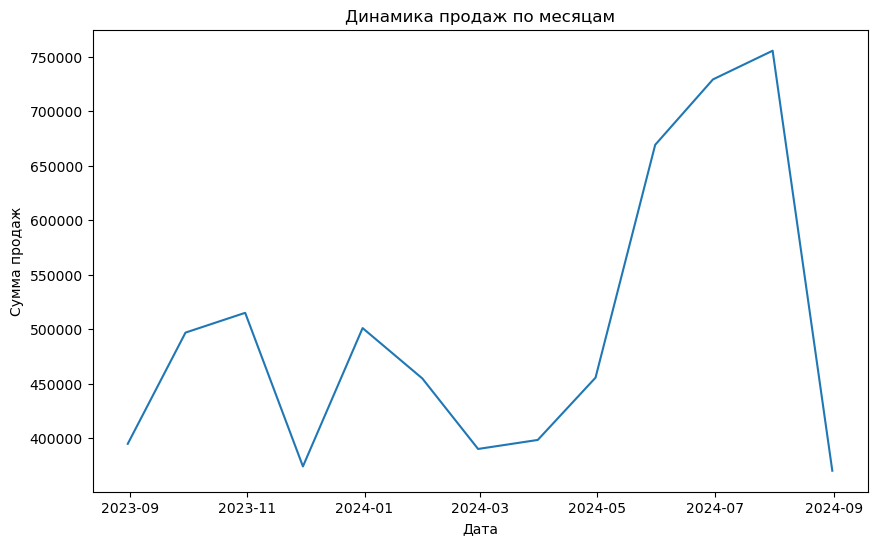

In [751]:
# Динамика продаж по месяцам

sales_by_month = orders.groupby(pd.Grouper(key='order_date', freq='ME')).agg({'order_amount': 'sum'})
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.index, sales_by_month['order_amount'])
plt.title('Динамика продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.show()

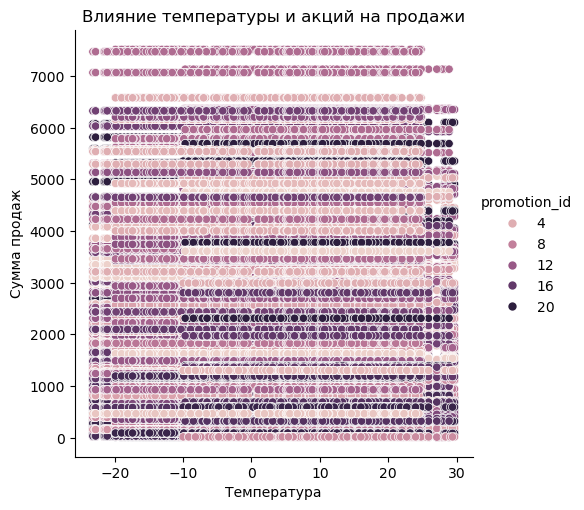

In [752]:
# Влияние погоды и акций на продажи
merged_orders_weather_promo_fn = merged_orders_weather_promo.dropna()
# plt.figure(figsize=(18, 8))
# sns.histplot(data=merged_orders_weather_promo, x="temperature", y="order_amount", hue="promotion_id", bins=20)
# plt.title('Влияние температуры и акций на продажи')
# plt.xlabel('Температура')
# plt.ylabel('Сумма продаж')
# plt.show()

sns.relplot(data=merged_orders_weather_promo_fn, x="temperature", y="order_amount", hue="promotion_id")
plt.title('Влияние температуры и акций на продажи')
plt.xlabel('Температура')
plt.ylabel('Сумма продаж')
plt.show()



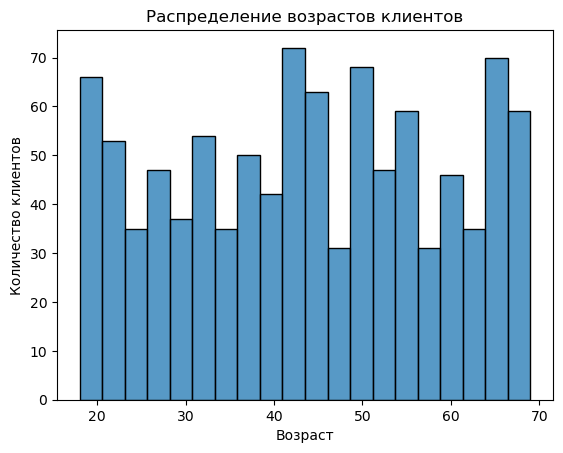

In [753]:
#Распределение возрастов клиентов
sns.histplot(data=customers, x='age', bins=20)
plt.title('Распределение возрастов клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Продуктовые метрики:

Рассчитайте основные продуктовые метрики: DAU, CAC (стоимость привлечения клиента), LTV (пожизненная ценность клиента).

In [754]:
# DAU
dau = visits.groupby('visit_date')['customer_id'].nunique()
dau.describe()

count    366.000000
mean      26.953552
std        5.056993
min       14.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       43.000000
Name: customer_id, dtype: float64

In [755]:
#CAC
# total_marketing_costs = promotions['cost'].sum()
# new_customers = visits.query("first_visit == True")['customer_id'].nunique()
# cac = total_marketing_costs / new_customers
# print(f"CAC: {cac}")

total_marketing_costs = visits['visit_cost'].sum()
new_customers = len(visits['customer_id'].unique())
#total_marketing_costs
#new_customers
cac = total_marketing_costs / new_customers
print(f"CAC: {cac}")

CAC: 34.43822


In [756]:
# LTV
ltv = customer_transactions['order_amount'].mean() / customer_transactions.shape[0]
print(f"LTV: {ltv}")

LTV: 6.957792338483289


A/B тестирование:

Компания тестирует две разные версии главной страницы своего сайта — версию A (стандартная страница) и версию B (страница с обновленным дизайном, где более активно представлены рекламные акции).  

Для каждой версии страницы собираются данные о визитах пользователей и их конверсии в заказы. Ваша задача — провести A/B тест и определить, есть ли статистически значимая разница в конверсии между этими двумя версиями.

In [757]:
version_a_conversions = visits.query("version == 'A' & visit_cost != 0.00")['customer_id'].count()
version_b_conversions = visits.query("version == 'B' & visit_cost != 0.00")['customer_id'].count()
total_visitors_a = visits.query("version == 'A'")['customer_id'].count()
total_visitors_b = visits.query("version == 'B'")['customer_id'].count()
conversion_rates = [version_a_conversions/total_visitors_a, version_b_conversions/total_visitors_b]
counts = [version_a_conversions, version_b_conversions]
nobs = [total_visitors_a, total_visitors_b]
z_stat, p_value = proportions_ztest(counts, nobs)
print(f"Z-статистика: {z_stat}, P-значение: {p_value}")

if p_value < 0.05:
    print("Есть статистически значимое различие между версиями.")
else:
    print("Нет статистически значимого различия между версиями.")


Z-статистика: 2.097991965246856, P-значение: 0.03590585514590728
Есть статистически значимое различие между версиями.


In [758]:
# Определение конверсий для версий A и B
version_conversions = orders.merge(visits_orders, on='customer_id', how='left')
version_conversions['converted'] = ~version_conversions['order_id_x'].isna()
conversion_rates = version_conversions.groupby(['version'])['converted'].mean().reset_index()
print(conversion_rates)

  version  converted
0       A        1.0
1       B        1.0


In [759]:
# Закрываем подключение к БД
conn.close()

Рекомендации:
На основе анализа данных, предложите три ключевые рекомендации по улучшению показателей магазина, учитывая влияние акций и внешних факторов (например, погоды).

Рекомендации:

1. Значение Z-статистики равно 2.10, что указывает на то, что средняя величина для версии B оказалась выше средней величины для версии A. P-значение составляет 0.036, что меньше уровня 0.05. Это означает, что различия между версиями являются статистически значимыми. Поэтому рекомендуется выбрать версию сайта B для дальнейшего использования, так как она продемонстрировала большую эффективность.

2. Динамика продаж ниже в весениие месяцы, возможно, нужно вводить промоакции на сезонные товары.

3. Видно , что количество продаж по всем акция максимальное при температуре на улице около 0 градусов. При эспримальных температурах хорошо работают промоакции с 10 по 20. Исходя из этого можно сделать вывод, что при температурах около 0 не имеет значения какую из промоакций использовать, но при температурах ниже -15 и выше 15 градусов стоит использовать акции 10 - 20. 